"Can demographic and geographic information be used to predict offense rates and crime types in different Local Government Areas?"

0        Banyule
1       Brimbank
2        Darebin
3    Hobsons Bay
4           Hume
Name: Local Government Area, dtype: object


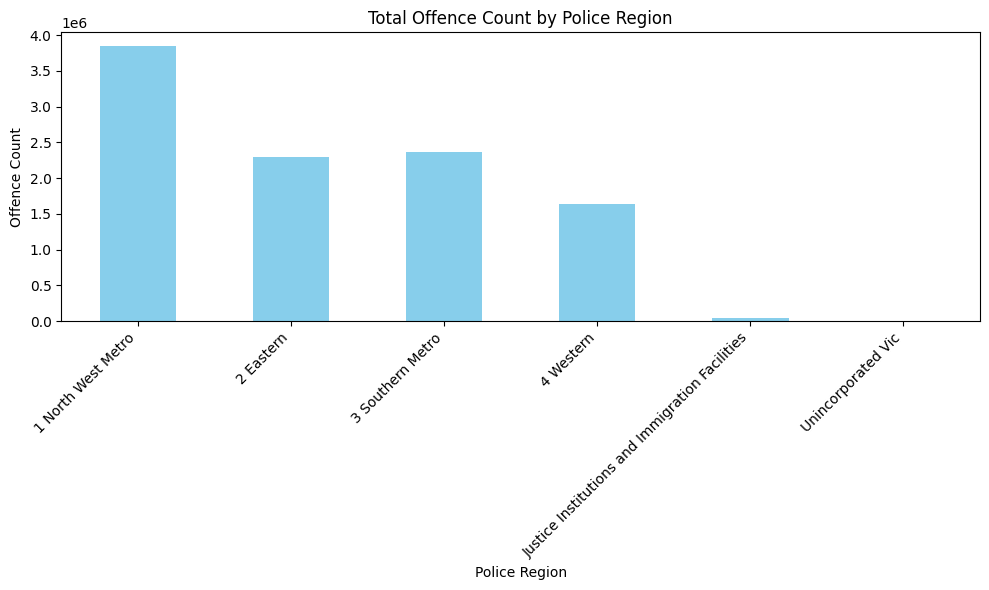

In [20]:
# Code 需要 sort
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Code 2
# Load the LGA offenses dataset (Table 1)
offenses_df = pd.read_excel('data/LGA Offences.xlsx', sheet_name='Table 01')

# Load the communities dataset
communities_df = pd.read_csv('data/communities.csv')

# Display the first few rows of each dataset
offenses_df.head()

# Code 3
# Remove leading and trailing spaces from the 'Local Government Area' column
offenses_df["Local Government Area"] = offenses_df["Local Government Area"].str.strip()

# Verify the changes
print(offenses_df["Local Government Area"].head())

# Code 4
# 2. Bar plot for Offence Count by Police Region
plt.figure(figsize=(10, 6))
offenses_df.groupby('Police Region')['Offence Count'].sum().plot(kind='bar', color='skyblue')
plt.title('Total Offence Count by Police Region')
plt.xlabel('Police Region')
plt.ylabel('Offence Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


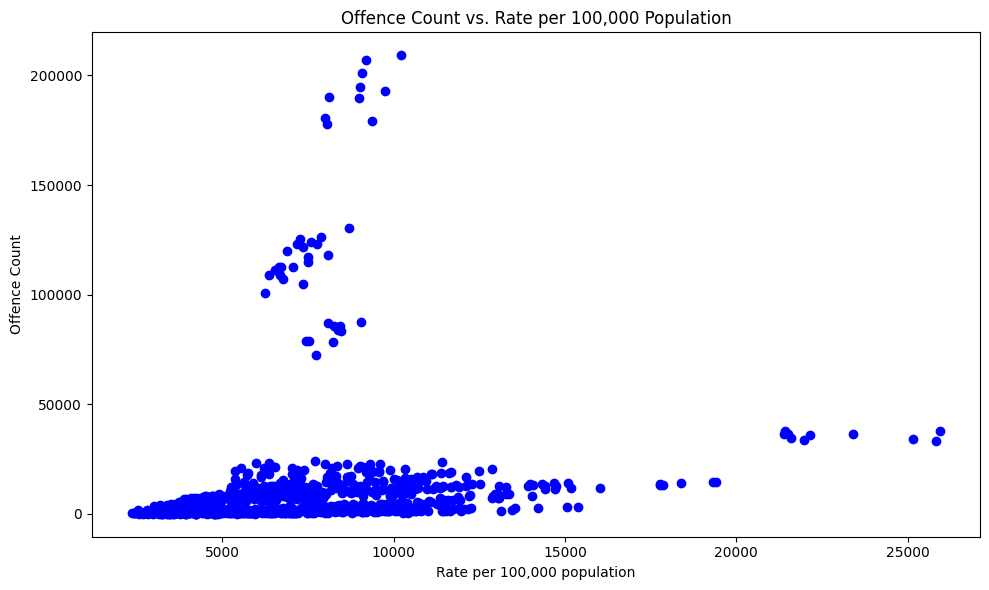

In [21]:
# 3. Scatter plot of Offence Count vs. Rate per 100,000 Population
plt.figure(figsize=(10, 6))
df_clean = offenses_df.dropna(subset=['Rate per 100,000 population'])
plt.scatter(df_clean['Rate per 100,000 population'], df_clean['Offence Count'], color='b')
plt.title('Offence Count vs. Rate per 100,000 Population')
plt.ylabel('Offence Count')
plt.xlabel('Rate per 100,000 population')
plt.tight_layout()
plt.show()


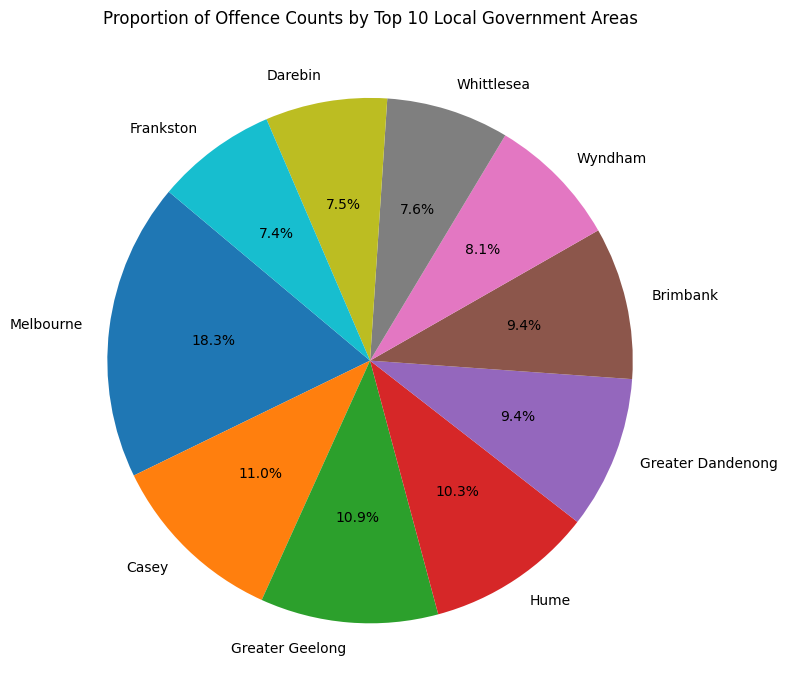

In [22]:
# Group by 'Local Government Area' and sum the 'Offence Count'
df_grouped = offenses_df.groupby('Local Government Area', as_index=False)['Offence Count'].sum()

# Filter out rows where 'Local Government Area' contains 'Total'
df_filtered = df_grouped[~df_grouped['Local Government Area'].str.contains('Total')]

# Sort the filtered DataFrame by 'Offence Count' and select the top 10 LGAs
top10_df = df_filtered.sort_values(by='Offence Count', ascending=False).head(10)

# Plot pie chart for the top 10 LGAs
plt.figure(figsize=(8, 8))
plt.pie(top10_df['Offence Count'], labels=top10_df['Local Government Area'], autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Offence Counts by Top 10 Local Government Areas')
plt.tight_layout()
plt.show()


In [23]:
# Merge the datasets on the LGA name (ignoring case)
merged_df = pd.merge(
    offenses_df,
    communities_df,
    left_on=offenses_df['Local Government Area'].str.lower(),
    right_on=communities_df['LGA'].str.lower(),
    how='inner'
)

In [24]:
merged_df

,key_0,Year,Year ending,Police Region,Local Government Area,Offence Count,"Rate per 100,000 population",Community Name,Region,Map reference,...,Time to nearest public hospital with maternity services,Distance to nearest public hospital with maternity services,"Presentations to emergency departments, 2012-13",Nearest public hospital with emergency department,Travel time to nearest public hospital with emergency department,Distance to nearest public hospital with emergency department,Presentations to emergency departments due to injury,"Presentations to emergency departments due to injury, %",Category 4 & 5 emergency department presentations,"Category 4 & 5 emergency department presentations, %"
0,unincorporated vic,2023,December,Unincorporated Vic,Unincorporated Vic,147,NaN,Falls Creek (Town),Hume,2,...,34.842485,30.377825,9.944488,Northeast Health Wangaratta,130.902919,138.976425,<5,NaN,7.95559002,80.0
1,unincorporated vic,2023,December,Unincorporated Vic,Unincorporated Vic,147,NaN,Mount Buller (Town),Hume,2,...,57.862575,45.838040,0.000000,Northeast Health Wangaratta,136.742096,148.204231,<5,NaN,<5,NaN
2,unincorporated vic,2022,December,Unincorporated Vic,Unincorporated Vic,107,NaN,Falls Creek (Town),Hume,2,...,34.842485,30.377825,9.944488,Northeast Health Wangaratta,130.902919,138.976425,<5,NaN,7.95559002,80.0
3,unincorporated vic,2022,December,Unincorporated Vic,Unincorporated Vic,107,NaN,Mount Buller (Town),Hume,2,...,57.862575,45.838040,0.000000,Northeast Health Wangaratta,136.742096,148.204231,<5,NaN,<5,NaN
4,unincorporated vic,2021,December,Unincorporated Vic,Unincorporated Vic,87,NaN,Falls Creek (Town),Hume,2,...,34.842485,30.377825,9.944488,Northeast Health Wangaratta,130.902919,138.976425,<5,NaN,7.95559002,80.0
5,unincorporated vic,2021,December,Unincorporated Vic,Unincorporated Vic,87,NaN,Mount Buller (Town),Hume,2,...,57.862575,45.838040,0.000000,Northeast Health Wangaratta,136.742096,148.204231,<5,NaN,<5,NaN
6,unincorporated vic,2020,December,Unincorporated Vic,Unincorporated Vic,56,NaN,Falls Creek (Town),Hume,2,...,34.842485,30.377825,9.944488,Northeast Health Wangaratta,130.902919,138.976425,<5,NaN,7.95559002,80.0
7,unincorporated vic,2020,December,Unincorporated Vic,Unincorporated Vic,56,NaN,Mount Buller (Town),Hume,2,...,57.862575,45.838040,0.000000,Northeast Health Wangaratta,136.742096,148.204231,<5,NaN,<5,NaN
8,unincorporated vic,2019,December,Unincorporated Vic,Unincorporated Vic,156,NaN,Falls Creek (Town),Hume,2,...,34.842485,30.377825,9.944488,Northeast Health Wangaratta,130.902919,138.976425,<5,NaN,7.95559002,80.0
9,unincorporated vic,2019,December,Unincorporated Vic,Unincorporated Vic,156,NaN,Mount Buller (Town),Hume,2,...,57.862575,45.838040,0.000000,Northeast Health Wangaratta,136.742096,148.204231,<5,NaN,<5,NaN


In [25]:
# Drop unnecessary columns and handle missing values
merged_df_clean = merged_df.dropna()


In [26]:
merged_df_clean

,key_0,Year,Year ending,Police Region,Local Government Area,Offence Count,"Rate per 100,000 population",Community Name,Region,Map reference,...,Time to nearest public hospital with maternity services,Distance to nearest public hospital with maternity services,"Presentations to emergency departments, 2012-13",Nearest public hospital with emergency department,Travel time to nearest public hospital with emergency department,Distance to nearest public hospital with emergency department,Presentations to emergency departments due to injury,"Presentations to emergency departments due to injury, %",Category 4 & 5 emergency department presentations,"Category 4 & 5 emergency department presentations, %"


In [27]:

# Convert categorical columns into numeric via Label Encoding
label_encoder = LabelEncoder()
for column in merged_df_clean.select_dtypes(include=['object']).columns:
    merged_df_clean[column] = label_encoder.fit_transform(merged_df_clean[column])

merged_df_clean.head()


,key_0,Year,Year ending,Police Region,Local Government Area,Offence Count,"Rate per 100,000 population",Community Name,Region,Map reference,...,Time to nearest public hospital with maternity services,Distance to nearest public hospital with maternity services,"Presentations to emergency departments, 2012-13",Nearest public hospital with emergency department,Travel time to nearest public hospital with emergency department,Distance to nearest public hospital with emergency department,Presentations to emergency departments due to injury,"Presentations to emergency departments due to injury, %",Category 4 & 5 emergency department presentations,"Category 4 & 5 emergency department presentations, %"
